In [1]:
import data2D as data_import
import os
import matplotlib.pyplot as plt
import numpy as np
from grid import Grid
import scipy.stats as stats

D = 1e-8
N = 16
Q = 1e-19
M = 1e-27

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(20, 10))


In [2]:
# 3.2 pico seconds for particle to travel L
def exec(method="Verlet",dt=1e-13, dt2=1e-12, tf=1, v=5e3, r=0):

    command = f"java -cp target/SimulacionTemporal-1.0-SNAPSHOT.jar \
                -Ddt={dt} -Ddt2={dt2} -Dtf={tf} \
                -Dv={v} -Dr={r} \
                -Dmethod={method} \
                ElectricFieldSystem"
    proc = os.popen(command)
    escaped = proc.readlines()[0]
    proc.close()
    data = data_import.Data("ElectricField.txt")
    return data, int(escaped)


In [3]:
def calculate_kinetic_energy(vx,vy,m):
    return 0.5*m*(vx**2 + vy**2)

Initial Energy 1.250071970886384e-18


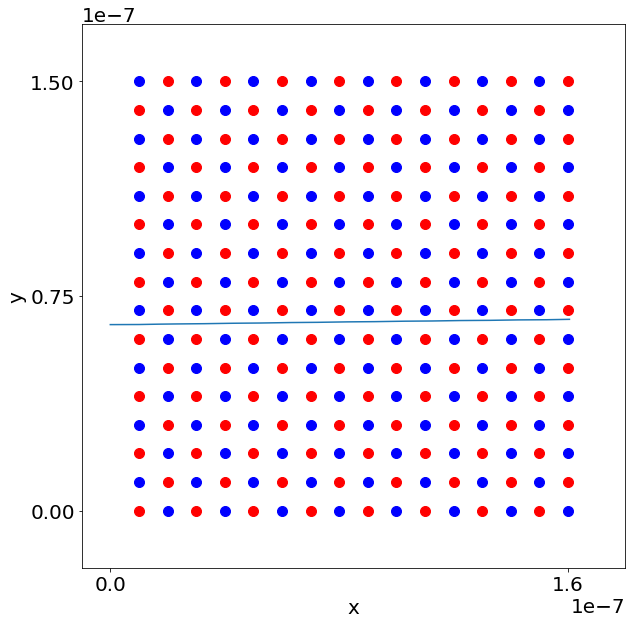

[7.197088638389774e-23, 7.197088638389774e-23, 7.200498150772992e-23, 7.200334501937683e-23, 7.194590477900143e-23, 7.180170704384412e-23, 7.152261183810928e-23, 7.103525542595722e-23, 7.022911915756759e-23, 6.893990206228875e-23, 6.692708487566584e-23, 6.384532419073201e-23, 5.921134417840562e-23, 5.237242688072417e-23, 4.249068083707304e-23, 2.856934055439205e-23, 9.560290556548056e-24, -1.5404769951182512e-23, -4.664341305933711e-23, -8.347057079636746e-23, -1.238357361140095e-22, -1.6429174770172927e-22, -2.0045933356464094e-22, -2.2789740948799487e-22, -2.4302031212401644e-22, -2.436537896491928e-22, -2.290426269654799e-22, -1.99420364330636e-22, -1.554081269560397e-22, -9.748203187374605e-23, -2.563604386404058e-23, 6.072665310075678e-23, 1.6267693673621193e-22, 2.8141259967056534e-22, 4.176556019498341e-22, 5.70773924321582e-22, 7.376792453518485e-22, 9.117203287483401e-22, 1.0820394224565894e-21, 1.2340462753873285e-21, 1.3515193072394091e-21, 1.4201506766036345e-21, 1.43133590

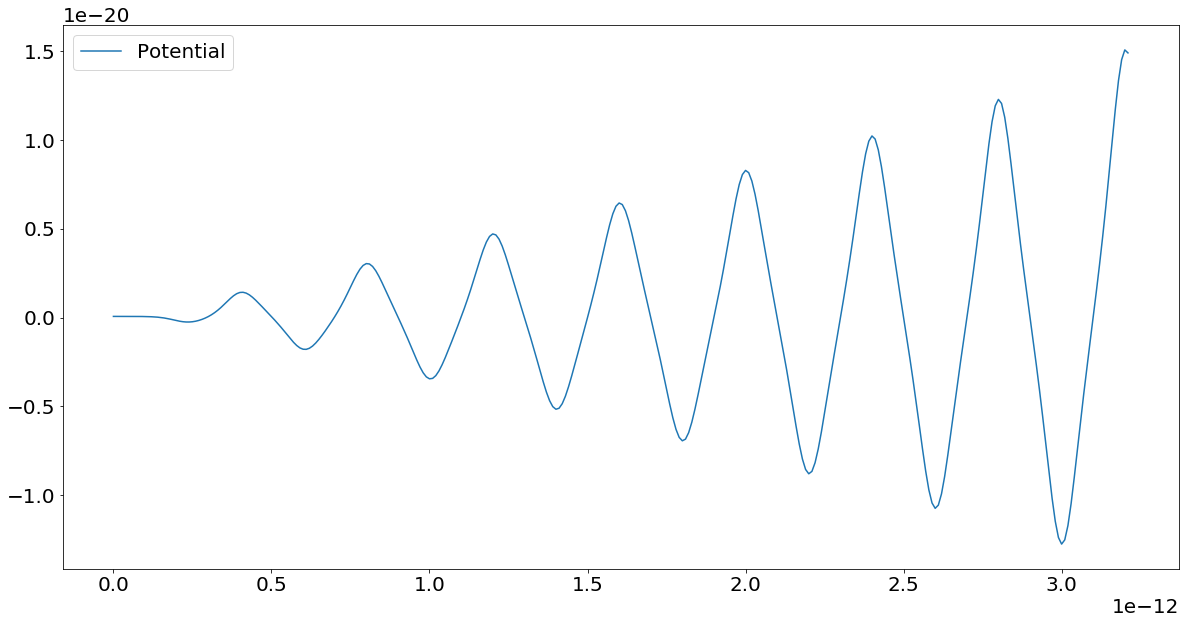

In [4]:
X = []
Y = []
E = []
T = []

grid = Grid(N, D, Q)
V = 5e4
r=-1
data, escaped = exec(method="Gear",r=r, dt=1e-14, dt2=1e-14, v=V)
EU = [grid.calculate_energy(0, (N-1)*D/2 + r*D, Q)]
EK = [calculate_kinetic_energy(V,0,M)]
E =  [EU[0] + EK[0]]
T.append(0)
X.append(0)
Y.append((N-1)*D/2 + r*D)
print("Initial Energy", E[0])
for t, x, y, vx, vy in data:
    T.append(t)
    X.append(x)
    Y.append(y)
    EU.append(grid.calculate_energy(x, y, Q))
    EK.append(calculate_kinetic_energy(vx, vy, M))
    E.append(EU[-1] + EK[-1])


plt.figure("Trajectory")
grid.plot()
plt.plot(X, Y, "-", markersize=1)
plt.xticks([0, N*D])
plt.yticks([0, (N-1)*D/2, N*D - D])
plt.ylim(-2*D, N*D + D)
plt.xlim(-D, N*D + 2*D)
plt.gca().set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure("Energy")

#print(EU)

plt.plot(T, E, label="Energy")
#plt.plot(T, EU, label="Potential")
#plt.plot(T, EK, label="Kinetic")
#plt.yscale("log")
#plt.plot(T, [E[0]]*len(T))
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useOffset=False)
#plt.ylim(0, max(E)*1.1)
plt.legend()
plt.show()


# 2.1

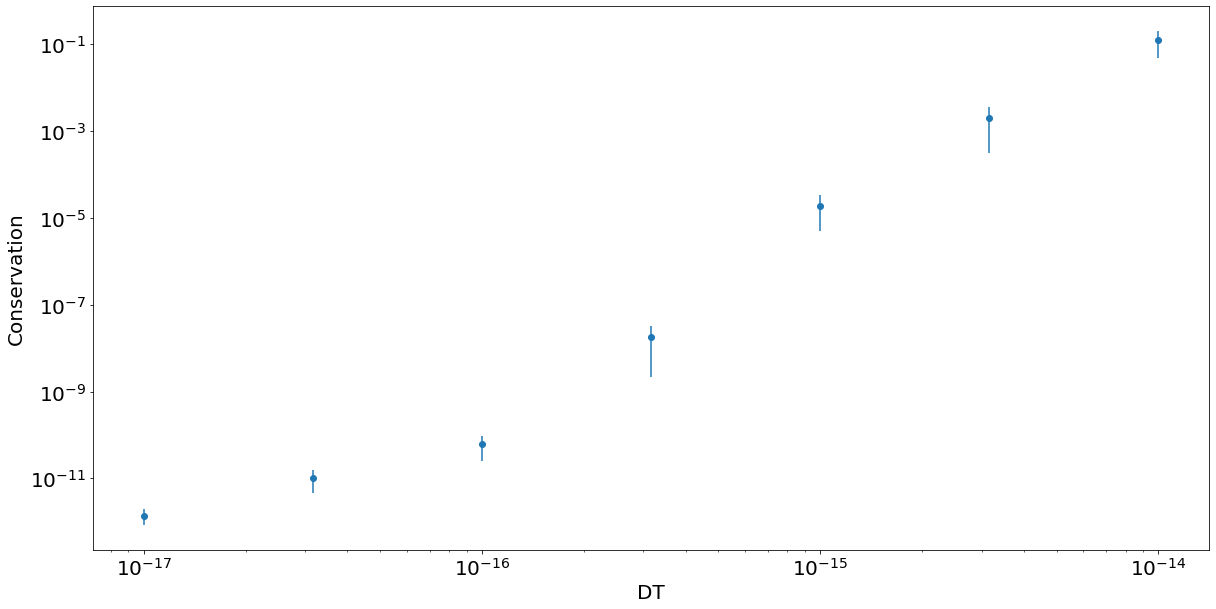

In [5]:
Y = np.linspace(-1, 1, 5)

V = 5e4

dts = np.logspace(-17, -14, 7)
#dts = [1e-17, 5e-17, 1e-16, 5e-16, 1e-15,5e-15,1e-14]

dt2 = max(dts)

means = []
errors = []

for dt in dts:

    mean = []
    for y in Y:
        Ei = grid.calculate_energy(0, (N-1)*D/2 + y*D, Q) + calculate_kinetic_energy(0, V, M)
        data, escaped = exec(method="Gear",dt=dt, dt2=dt2, v=V, r=y)

        for t, x, y, vx, vy in data:
            pass

        Ef = grid.calculate_energy(x, y, Q) + calculate_kinetic_energy(vx, vy, M)
        mean.append(np.abs(Ef/Ei - 1))

    error = np.std(mean)/np.sqrt(len(mean))
    mean = np.mean(mean)

    means.append(mean)
    errors.append(error)


plt.errorbar(dts, means, yerr=errors, fmt='o')

plt.xlabel("DT")
plt.ylabel("Conservation")
plt.yscale("log")
plt.xscale("log")
plt.show()


# 2.2

In [88]:
V = np.linspace(5e3, 5e4, 5)

Y = np.linspace(-1, 1, 200)

dt = 1e-15
dt2 = 1e-14

dataset  = {}

for v in V:

    dataset[v] = {}
    
    escaped_sum = [0, 0, 0, 0, 0]
    for y in Y:
        dataset[v][y] = {}
        data, escaped = exec(method="Gear",dt=dt, dt2=dt2, tf=1e12, v=v, r=y)

        dataset[v][y]["escaped"] = escaped

        long = 0
        xv = 0
        for t, x, _,_,_ in data:
            long += np.abs(x-xv)
            xv = x
       
        dataset[v][y]["long"] = long




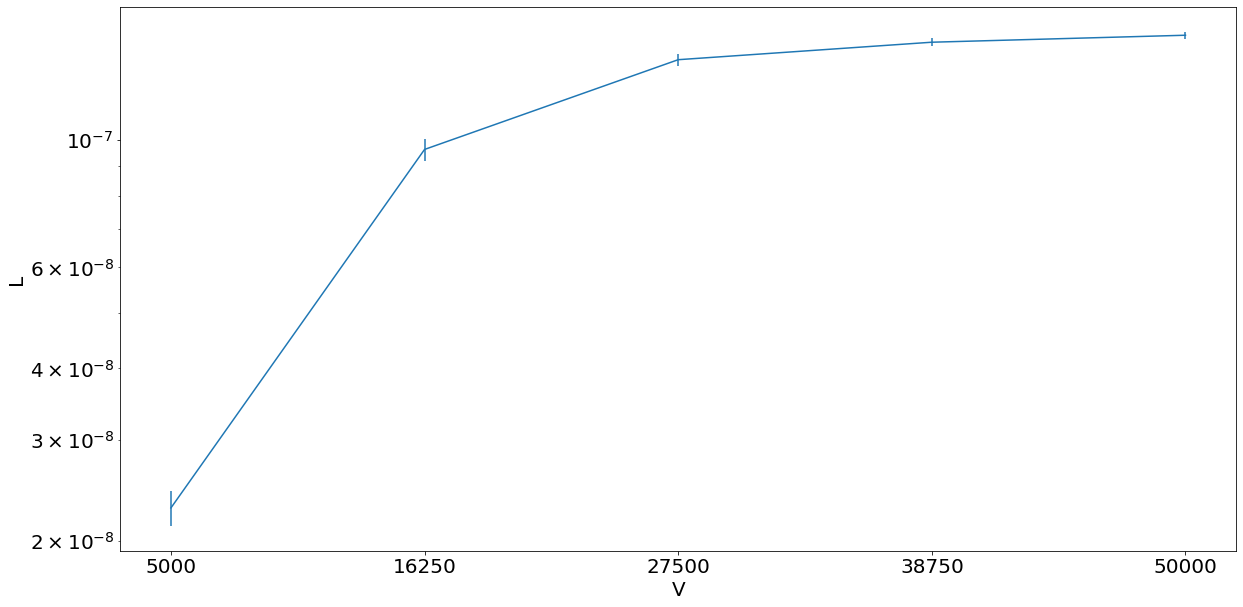

In [89]:
means = []
errors = []
for v, arr in dataset.items():
    L = [ m["long"] for y,m in arr.items()]
    means.append(np.mean(L))
    errors.append(np.std(L)/np.sqrt(len(L)))


plt.figure("Longitud vs Velocidad")
plt.errorbar(V, means, yerr=errors)
plt.xticks(V)
plt.yscale("log")
plt.xlabel("V")
plt.ylabel("L")

plt.show()



# 2.3

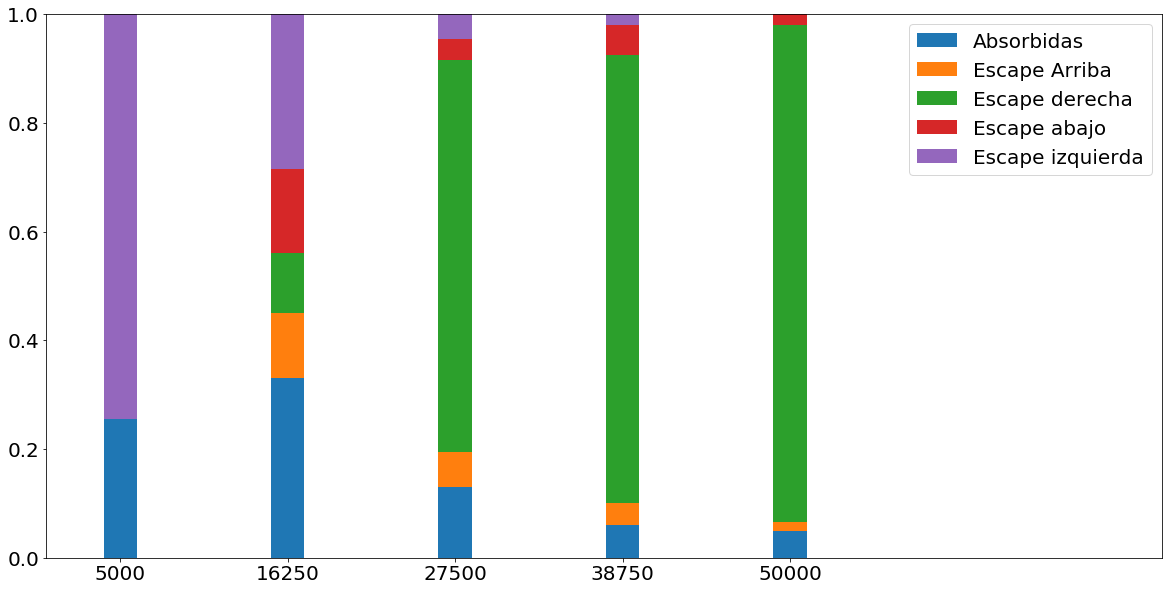

In [116]:
labels = ["Absorbidas", "Escape Arriba", "Escape derecha", "Escape abajo", "Escape izquierda"]


escapes = {}


for v, dic in dataset.items():
    escapes[v] = np.zeros(len(labels))


    for y, m in dic.items():
        index = m["escaped"]
        escapes[v][index] += 1
    
    escapes[v]/=len(Y)


plt.figure("Escapadas vs V")
x = np.arange(len(labels))
width =( V[1]-V[0] )/ 5
arr = np.zeros(len(labels))
bottom = np.zeros(len(labels))
for i, label in enumerate(labels):
    bottom +=np.array(arr)
    arr = [ v[i] for k,v in escapes.items()]
    plt.bar(V,arr, width=width, label=label, bottom=bottom)
    #plt.bar(V+i*width - width*len(labels)/2,arr, width=width, label = label)

plt.legend()
plt.xticks(V)
plt.xlim(0,V[-1]*1.5)
plt.show()

## 2.4

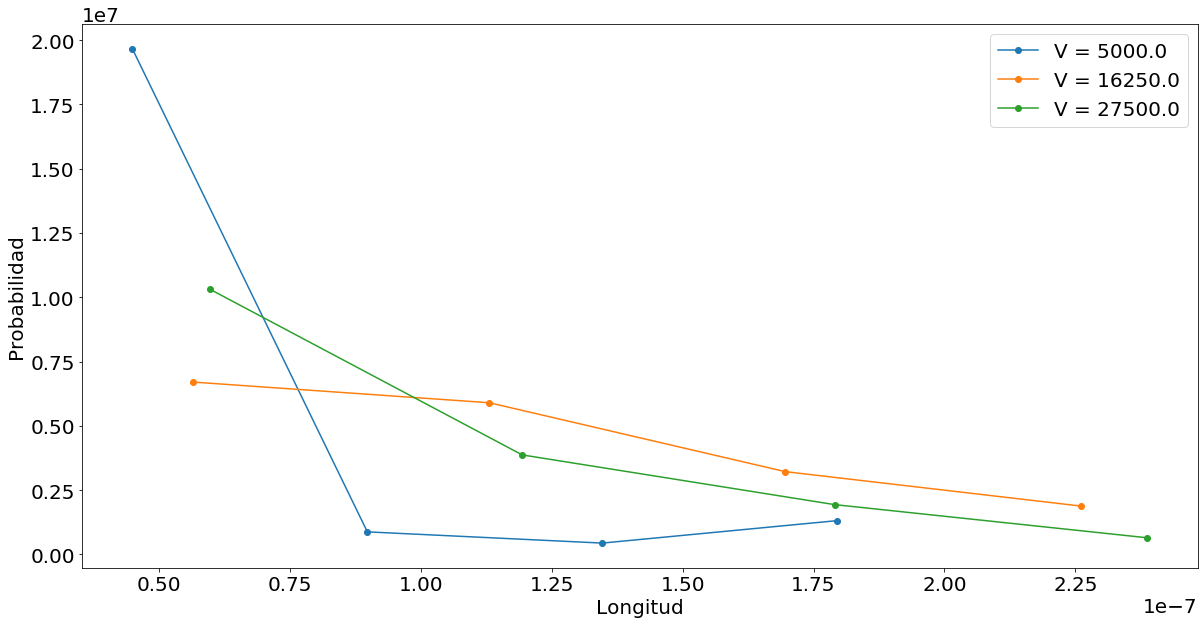

In [117]:

longituds = {}

for v, dic in dataset.items():
    arr = []
    for y, m in dic.items():
        if m["escaped"] == 0:
            arr.append(m["long"])
        
    if arr:
        longituds[v] = arr


for v, arr in longituds.items():
    if len(arr) < 25:
        continue
    n_bins = 5
    bins = np.linspace(0, max(arr), n_bins)
    size = bins[1] - bins[0]
    y = np.histogram(arr, bins=bins)
    x=y[1][1:]
    y = np.array(y[0])/(len(arr)*size)


    #plt.hist(y, bins=n_bins, label=v)
    plt.plot(x,y,"o-", label="V = {}".format(v))

#plt.xlim(0, 1e-7)

# means = []
# stdevs = []
# labels = []
# for v, arr in longituds.items():
#     stdev = np.std(arr)
#     if stdev != 0:
#         means.append(np.mean(arr))
#         stdevs.append(np.std(arr))
#         labels.append(v)



# plt.figure("Gauss")

# for mean,stdev,v in zip(means, stdevs, labels):
#     x = np.linspace(mean -3*stdev, mean  + 3*stdev, 100)
#     y = stats.norm.pdf(x, mean, stdev)
#     #y/=np.max(y)
#     plt.plot(x,y, label = str(v))
plt.xlabel("Longitud")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()